# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [38]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [3]:
# function to intialize the weights and bias randomly
def initialize(dim,zeros=False):
    if(zeros):
        b = 0
        w = np.zeros(dim)
    
    else:
        b = np.random.random()
        w = np.random.rand(dim)
    return b, w

In [4]:
# function to predict the output
def predict_y(x,w,b):
    return  np.dot(x,w) + b


In [5]:
def compute_cost_reg(x, y, w, b,lambda_):
   
    m,n = x.shape 
    cost = 0
    
    for i in range(m):
        f_wb =  predict_y(x[i],w,b)
        cost = cost + (f_wb - y[i])**2
    cost = cost / (2 * m)

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost
    
    total_cost = cost + reg_cost
    return total_cost

In [6]:
def compute_gradient_reg(x,y,w,b,lambda_):
    m,n = x.shape    
    dj_dw = np.zeros(n)
    dj_db = 0.  
    
    for i in range(m):  
        err = predict_y(x[i],w,b) - y[i]
        dj_db += err
        for j in range(n):
            dj_dw[j] += err * x[i][j]
    for j in range(n):
        dj_dw[j] += (lambda_ * w[j] / m)
    dj_dw = dj_dw / m 
    dj_db = dj_db / m
    # d_w = d_w / n
    # d_b = d_b /  n
    return dj_dw, dj_db

In [7]:
def gradient_descent_reg(x,y,w_in,b_in,iter,lr,lambda_):
    w = np.zeros_like(w_in)
    b = 0
    j_history = []
    for i in range(iter): 
        d_w, d_b = compute_gradient_reg(x,y,w,b,lambda_)
        w = w - lr * d_w
        b = b - lr * d_b
        j_history.append(compute_cost_reg(x,y,w,b,lambda_))
    return w,b,j_history

In [39]:
X_train

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

613.7468436160045


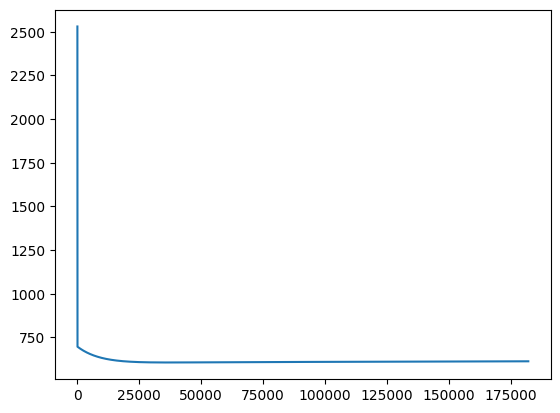

In [48]:
iterations = 182000
alpha = 5.0e-7
lambda_ = 100
dim = len(X_train[0])
b,w = initialize(dim)
w,b,j = gradient_descent_reg(X_train,y_train,w_in=w,b_in=b,iter=iterations,lr=alpha,lambda_=lambda_)
plt.plot(list(range(iterations)),j)
print(j[-1])